In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [493]:
dados = pd.read_csv("data/ca-NE-unido.csv")

In [494]:

# Mostra o nome das colunas
print("Nomes das colunas:")
print(dados.columns)

Nomes das colunas:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')


In [495]:
# Verificando quais colunas contêm valores nulos
colunas_nulas = dados.isnull().sum()

# Filtrando para mostrar apenas as colunas que têm valores nulos
colunas_com_nulos = colunas_nulas[colunas_nulas > 0]

print("Colunas com valores nulos:")
print(colunas_com_nulos)

Colunas com valores nulos:
Numero Rua            252
Complemento        248206
Bairro                445
Valor de Compra    354852
dtype: int64


## Pre-Processamento

In [496]:
print("tamanho dos dados antes do pre-processamento:",len(dados))
dados.head(5)


tamanho dos dados antes do pre-processamento: 354852


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,03/01/2022,"6,69",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,03/01/2022,"5,29",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,03/01/2022,"5,49",NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,03/01/2022,"6,79",NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,03/01/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA


In [497]:
dados['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'], format='%d/%m/%Y')
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.', regex=False).astype(float)
dados = dados[dados['Produto'] == 'GASOLINA']
dados = dados[dados['Estado - Sigla'] == 'CE']


dados.set_index('Data da Coleta', inplace=True)

dados['Ano'] = dados.index.year.astype(float)

dados['Mes'] = dados.index.month.astype(float)

dados = dados.drop(columns=['Valor de Compra'])
dados = dados.drop(columns=['Numero Rua'])
dados = dados.drop(columns=['Complemento'])
dados = dados.drop(columns=['CNPJ da Revenda'])



In [498]:
print("tamanho dos dados após pre-processamento:",len(dados))
dados.head(5)

tamanho dos dados após pre-processamento: 15805


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Nome da Rua,Bairro,Cep,Produto,Valor de Venda,Unidade de Medida,Bandeira,Ano,Mes
Data da Coleta,,,,,,,,,,,,,
2022-01-03,NE,CE,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,AVENIDA MONSENHOR TABOSA,JULHO,62505-650,GASOLINA,7.12,R$ / litro,ALESAT,2022.0,1.0
2022-01-03,NE,CE,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,CE 168,VIOLETE,62500-001,GASOLINA,7.10,R$ / litro,SP,2022.0,1.0
2022-01-03,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,RODOVIA MARANGUAPE - FORTALEZA - KM 06,PARQUE LUZARDO VIANA,61910-000,GASOLINA,6.77,R$ / litro,IPIRANGA,2022.0,1.0
2022-01-03,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,ESTRADA FORTALEZA MARANGUAPE,KAGADO,61901-410,GASOLINA,6.47,R$ / litro,VIBRA ENERGIA,2022.0,1.0
2022-01-03,NE,CE,MARACANAU,POSTO BOTO LTDA,AVENIDA PADRE JOSE HOLANDA DO VALE,PIRATININGA,61905-000,GASOLINA,6.75,R$ / litro,RAIZEN,2022.0,1.0


In [499]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Definindo colunas categóricas e numéricas
categorical_features = ['Municipio', 'Revenda', 'Bairro', 'Bandeira', 'Nome da Rua']
numeric_features = ['Ano', 'Mes','Valor de Venda']

# Separando as features e o target
X = dados[categorical_features + numeric_features]
y = dados['Valor de Venda']

# Determinando os tamanhos dos conjuntos de treino, validação e teste
n = len(X)
train_size = int(n * 0.72)  # 72% para treino
val_size = int(n * 0.18)    # 18% para validação
test_size = n - train_size - val_size  # 10% para teste

# Dividindo os dados
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Configurando o pré-processador para aplicar OneHotEncoding apenas nas colunas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Mantém as features numéricas na escala original
)

# Criando o pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicando o pipeline aos dados de treino e transformando
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

# Obtendo os nomes das colunas após o OneHotEncoding e mantendo as colunas numéricas
categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
all_feature_names = list(categorical_feature_names) + numeric_features

# Convertendo as matrizes para DataFrames e ajustando os índices para frequência diária
X_train_transformed_df = pd.DataFrame(X_train_transformed, 
                                      columns=all_feature_names,
                                      index=X_train.index)

X_val_transformed_df = pd.DataFrame(X_val_transformed, 
                                    columns=all_feature_names,
                                    index=X_val.index)

X_test_transformed_df = pd.DataFrame(X_test_transformed, 
                                     columns=all_feature_names,
                                     index=X_test)

# Verificando os tamanhos dos conjuntos e o ajuste de índices
print("Treinamento:", X_train_transformed_df.shape)
print("Validação:", X_val_transformed_df.shape)
print("Teste:", X_test_transformed_df.shape)

'''# Adicionando a coluna 'Valor de Venda' aos dados de treino e validação originais
dados_treino = X_train.copy()
dados_val = X_val.copy()

dados_treino['Valor de Venda'] = y_train
dados_val['Valor de Venda'] = y_val'''


Treinamento: (11379, 1023)
Validação: (2844, 1023)
Teste: (1582, 1023)


"# Adicionando a coluna 'Valor de Venda' aos dados de treino e validação originais\ndados_treino = X_train.copy()\ndados_val = X_val.copy()\n\ndados_treino['Valor de Venda'] = y_train\ndados_val['Valor de Venda'] = y_val"

In [500]:
# Concatenando os DataFrames transformados de treinamento e validação
X_train_val = pd.concat([X_train, X_val])

# Concatenando os valores de y correspondentes para treinamento e validação
y_train_val_combined = pd.concat([y_train, y_val])

# Adicionando a coluna 'Valor de Venda' ao DataFrame combinado
X_train_val['Valor de Venda'] = y_train_val_combined.values

# Verificando o resultado
display(X_train_val.head())
print("Tamanho do DataFrame combinado:", X_train_val.shape)


,Municipio,Revenda,Bairro,Bandeira,Nome da Rua,Ano,Mes,Valor de Venda
Data da Coleta,,,,,,,,
2022-01-03,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,ALESAT,AVENIDA MONSENHOR TABOSA,2022.0,1.0,7.12
2022-01-03,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,SP,CE 168,2022.0,1.0,7.10
2022-01-03,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,PARQUE LUZARDO VIANA,IPIRANGA,RODOVIA MARANGUAPE - FORTALEZA - KM 06,2022.0,1.0,6.77
2022-01-03,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,VIBRA ENERGIA,ESTRADA FORTALEZA MARANGUAPE,2022.0,1.0,6.47
2022-01-03,MARACANAU,POSTO BOTO LTDA,PIRATININGA,RAIZEN,AVENIDA PADRE JOSE HOLANDA DO VALE,2022.0,1.0,6.75


Tamanho do DataFrame combinado: (14223, 8)


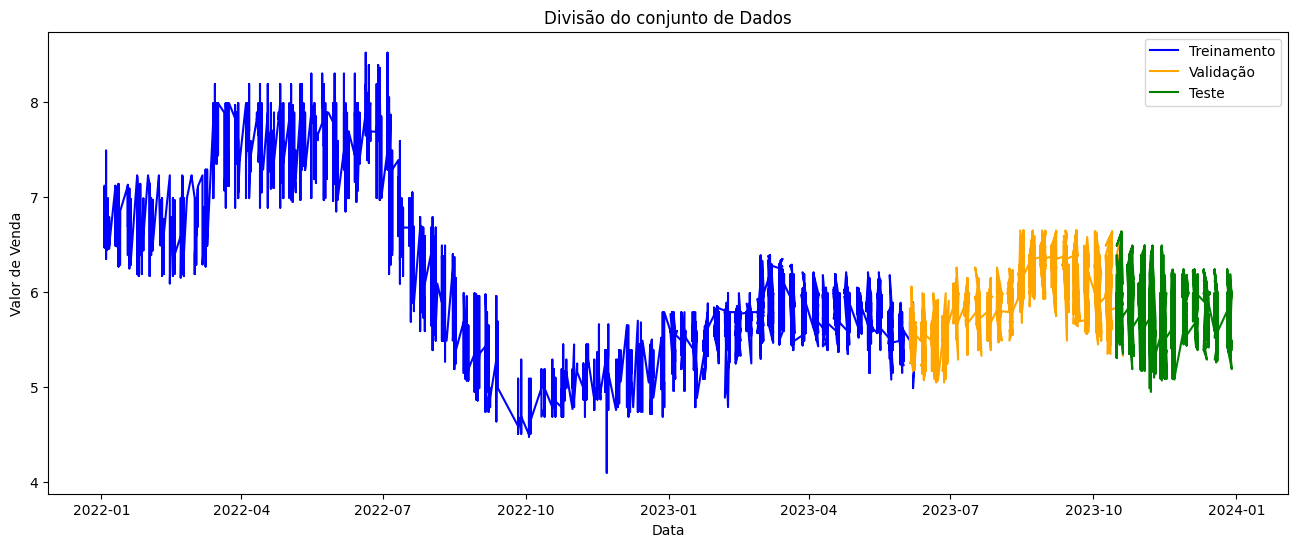

In [501]:
plt.figure(figsize=(16,6))

plt.title("Divisão do conjunto de Dados")

plt.plot(y_train,label='Treinamento', color='blue')
plt.plot(y_val,label='Validação', color='orange')
plt.plot(y_test,label='Teste', color='green')

plt.xlabel("Data")
plt.ylabel("Valor de Venda")
plt.legend()

plt.show()

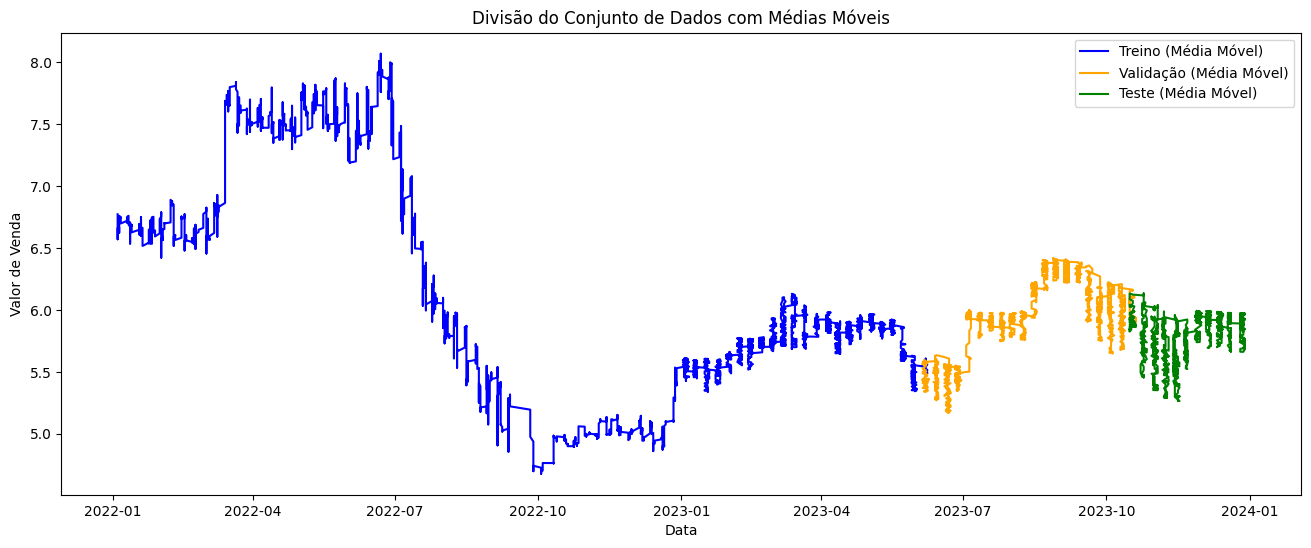

In [502]:
# Aplicando médias móveis com uma janela de 10 períodos (por exemplo)
y_train_rolling = y_train.rolling(window=30).mean()
y_val_rolling = y_val.rolling(window=30).mean()
y_test_rolling = y_test.rolling(window=30).mean()

# Plotando as médias móveis
plt.figure(figsize=(16, 6))

plt.title("Divisão do Conjunto de Dados com Médias Móveis")

plt.plot(y_train_rolling, label='Treino (Média Móvel)', color='blue')
plt.plot(y_val_rolling, label='Validação (Média Móvel)', color='orange')
plt.plot( y_test_rolling, label='Teste (Média Móvel)', color='green')

plt.xlabel("Data")
plt.ylabel("Valor de Venda")
plt.legend()

plt.show()


## Análise de Autocorrelação

<function matplotlib.pyplot.show(close=None, block=None)>

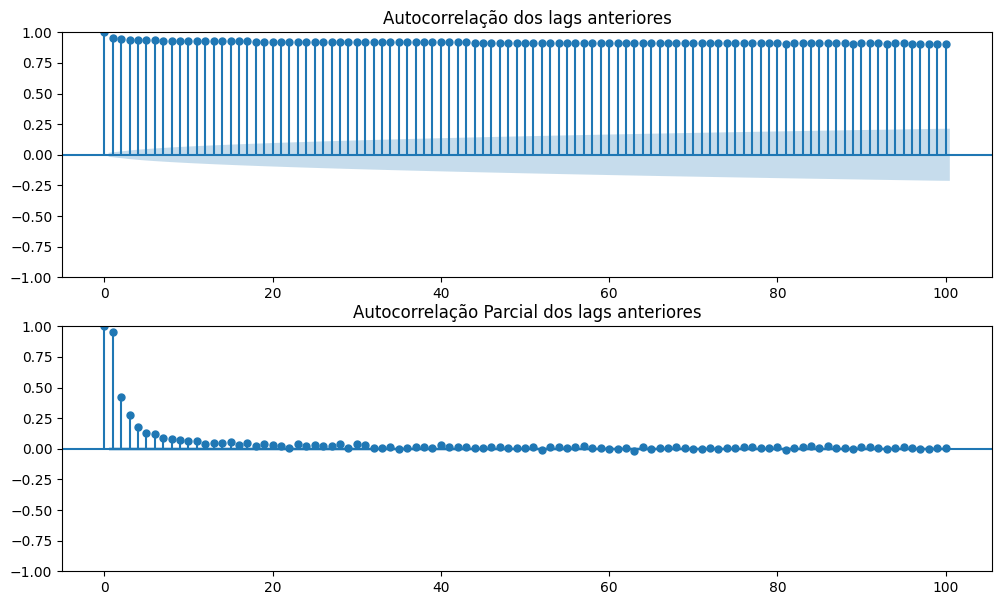

In [503]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(X_train_val['Valor de Venda'], lags=100, ax=ax1)
ax1.set_title("Autocorrelação dos lags anteriores")

ax2 = fig.add_subplot(212)
fig = plot_pacf(X_train_val['Valor de Venda'], lags=100, ax=ax2)
ax2.set_title("Autocorrelação Parcial dos lags anteriores")

plt.show

# Devo continuar usando os Dados completos aqui?

Lags Significantes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 38, 40, 41, 42, 43, 46, 47, 53, 57, 80, 83, 84, 86, 91, 94, 95]


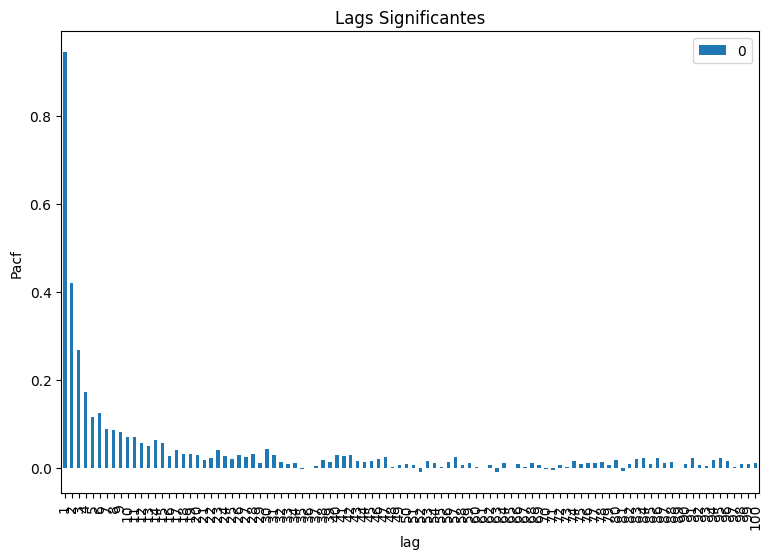

In [504]:
from statsmodels.tsa.stattools import pacf

def getSignificantLags(y, nLags = 5, alpha=0.05):
    Pacf, Pacf_intervalos =  pacf(x=y, nlags=nLags, alpha=alpha)
    pd.DataFrame(Pacf)[1:].plot(kind='bar', figsize=(9,6), legend='pacf valores',
                               xlabel='lag', ylabel='Pacf');
    significantLags = []
    for i in range(1, len(Pacf)):
        # print(pac[i], pac_ci[i][0], pac_ci[i][1])
        if Pacf[i] < Pacf_intervalos[i][0] - Pacf[i] or Pacf[i] > Pacf_intervalos[i][1] - Pacf[i]:
            significantLags.append(i)
    print('Lags Significantes:', significantLags)
    return significantLags

DT_significantLags = getSignificantLags(dados['Valor de Venda'], nLags = 100, alpha=0.05)
plt.title("Lags Significantes")
plt.show()
# Colocar 100 de valores de lag

## Modelagem

In [505]:
def appendLagVariables(y, significantLags, df, dropna=True, previousData=None):
    prefix = y.replace(')', '')
    df = df.copy()  # Fazendo uma cópia para evitar modificar o original
    lowerIndex = 0
    x = df[y]
    
    if previousData is not None:
        x = pd.concat([previousData[y], x])
        lowerIndex = previousData.shape[0]
    
    for lag in significantLags:
        varNm = prefix + '-' + str(lag) + ')'
        df[varNm] = x.shift(lag)[lowerIndex:]
    
    if dropna:
        # Dropar apenas linhas onde os NaN estão nas colunas de lag, preservando a coluna 'Valor de Venda'
        lag_columns = [prefix + '-' + str(lag) + ')' for lag in significantLags]
        df.dropna(subset=lag_columns, inplace=True)
        
    return df

# Usar a função para gerar as variáveis de lag e atribuir ao DataFrame X_train_transformed_df
X_train_transformed_df = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_train_transformed_df, 
    dropna=True
)

X_val_transformed_df = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_val_transformed_df, 
    dropna=True
)

X_test_transformed_df = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_test_transformed_df, 
    dropna=True
)


y_train = X_train_transformed_df['Valor de Venda']
y_val = X_val_transformed_df['Valor de Venda']
y_test = X_test_transformed_df['Valor de Venda']



X_val_transformed_df = X_val_transformed_df.drop(columns=['Valor de Venda'])
X_test_transformed_df = X_test_transformed_df.drop(columns=['Valor de Venda'])
X_train_transformed_df = X_train_transformed_df.drop(columns=['Valor de Venda'])


In [506]:
X_train_transformed_df

,Municipio_CANINDE,Municipio_CAUCAIA,Municipio_CRATEUS,Municipio_CRATO,Municipio_FORTALEZA,Municipio_ICO,Municipio_IGUATU,Municipio_ITAPIPOCA,Municipio_JUAZEIRO DO NORTE,Municipio_LIMOEIRO DO NORTE,...,Valor de Venda-47),Valor de Venda-53),Valor de Venda-57),Valor de Venda-80),Valor de Venda-83),Valor de Venda-84),Valor de Venda-86),Valor de Venda-91),Valor de Venda-94),Valor de Venda-95)
Data da Coleta,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.89,6.67,6.69,7.11,6.47,6.47,6.74,6.75,7.10,7.12
2022-01-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.49,6.85,6.62,6.99,7.11,6.47,6.47,6.87,6.77,7.10
2022-01-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.89,6.65,6.69,6.79,7.12,7.11,6.47,6.47,6.47,6.77
2022-01-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.79,6.89,6.79,6.59,7.11,7.12,6.47,6.75,6.75,6.47
2022-01-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.77,6.49,6.67,6.98,6.99,7.11,7.11,7.11,6.87,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.87,5.63,5.59,5.27,5.42,5.24,5.29,5.42,5.29,5.39
2023-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.49,5.25,5.63,5.59,5.49,5.42,5.57,5.49,5.25,5.29
2023-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.27,5.47,5.24,5.27,5.49,5.49,5.24,5.49,5.47,5.25


In [507]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Inicializando o modelo
reg = DecisionTreeRegressor()

# Treinando o modelo
reg.fit(X_train_transformed_df, y_train.values.ravel())  # Convertendo y_train para um array 1D

# Fazendo previsões
predicao = reg.predict(X_val_transformed_df)

# Garantindo que y_val seja uma Series e não um DataFrame
y_val_series = y_val.values.ravel()  # Convertendo y_val para um array 1D

# Calculando a diferença entre os valores reais e previstos
diferenca = mean_squared_error(y_val_series, predicao)

# Se você precisar imprimir ou fazer algo com a diferença
print(f"MSE (Mean Squared Error): {diferenca}")




MSE (Mean Squared Error): 0.09361658785012734


In [508]:
# Fazendo previsões
predicao = reg.predict(X_val_transformed_df)


# Criando um DataFrame com valores reais e previstos, mantendo os índices
df_comparacao = pd.DataFrame({
    'Valor Real': y_val_series,
    'Valor Previsto_DT': predicao
}, index=y_val.index)

# Supondo que 'Municipio' esteja em X_val
# Adicionando a coluna 'Municipio' ao DataFrame df_comparacao
# df_comparacao['Municipio'] = X_val['Municipio']

# Mostrando o DataFrame
display(df_comparacao)



,Valor Real,Valor Previsto_DT
Data da Coleta,,
2023-06-07,5.59,5.59
2023-06-06,5.45,5.29
2023-06-06,5.63,5.59
2023-06-05,5.49,5.39
2023-06-07,5.88,5.70
...,...,...
2023-10-16,6.38,5.98
2023-10-16,6.34,5.98
2023-10-17,6.29,6.37


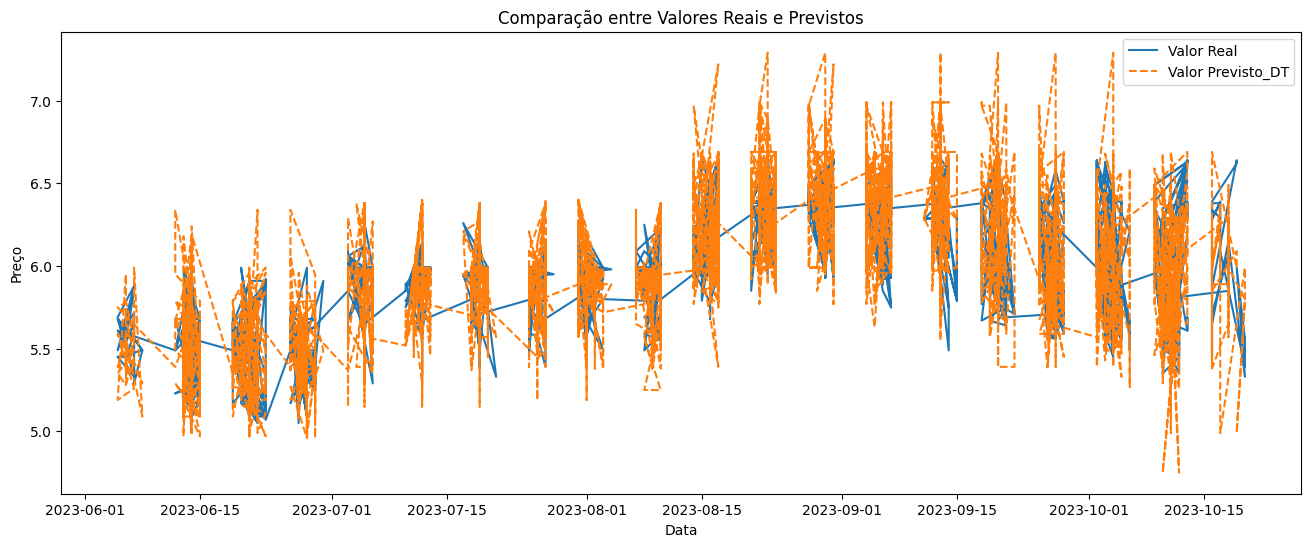

In [509]:
# Plotando os resultados
plt.figure(figsize=(16, 6))
plt.plot(df_comparacao['Valor Real'], label='Valor Real')
plt.plot(df_comparacao['Valor Previsto_DT'], label='Valor Previsto_DT', linestyle='--')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


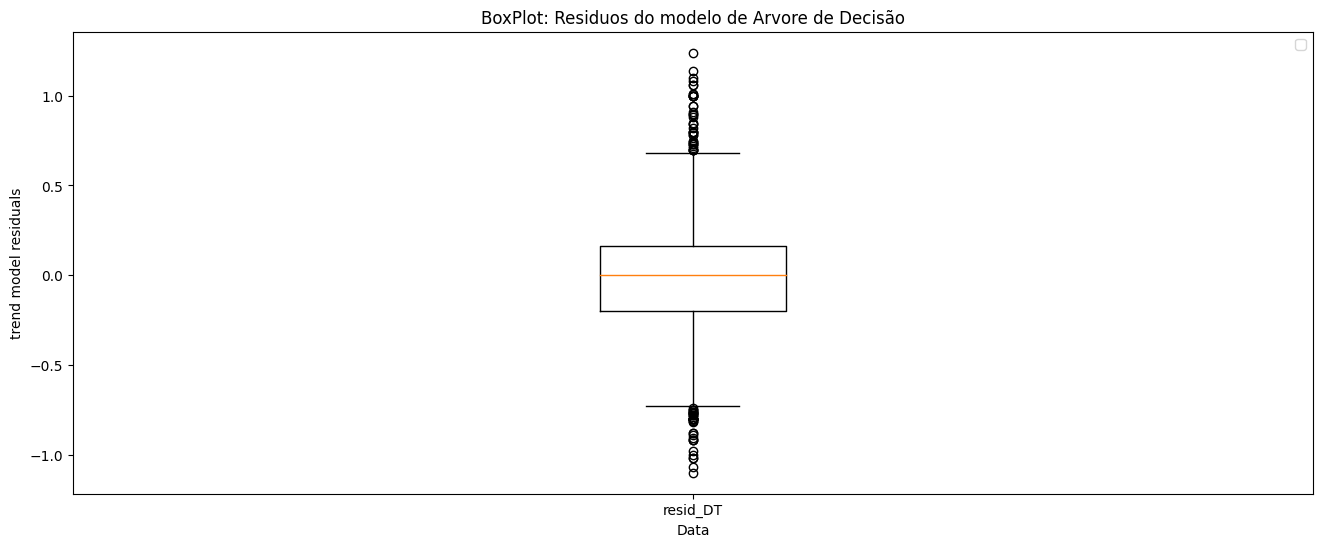

In [510]:
df_comparacao['resid_DT'] = df_comparacao['Valor Real'].subtract(df_comparacao['Valor Previsto_DT'])
plt.figure(figsize=(16, 6))
plt.boxplot(df_comparacao[['resid_DT']].iloc[1:, :], 
            labels = ['resid_DT'])

plt.title("BoxPlot: Residuos do modelo de Arvore de Decisão")
plt.xlabel('Data')
plt.ylabel('trend model residuals')
plt.legend()

plt.show()

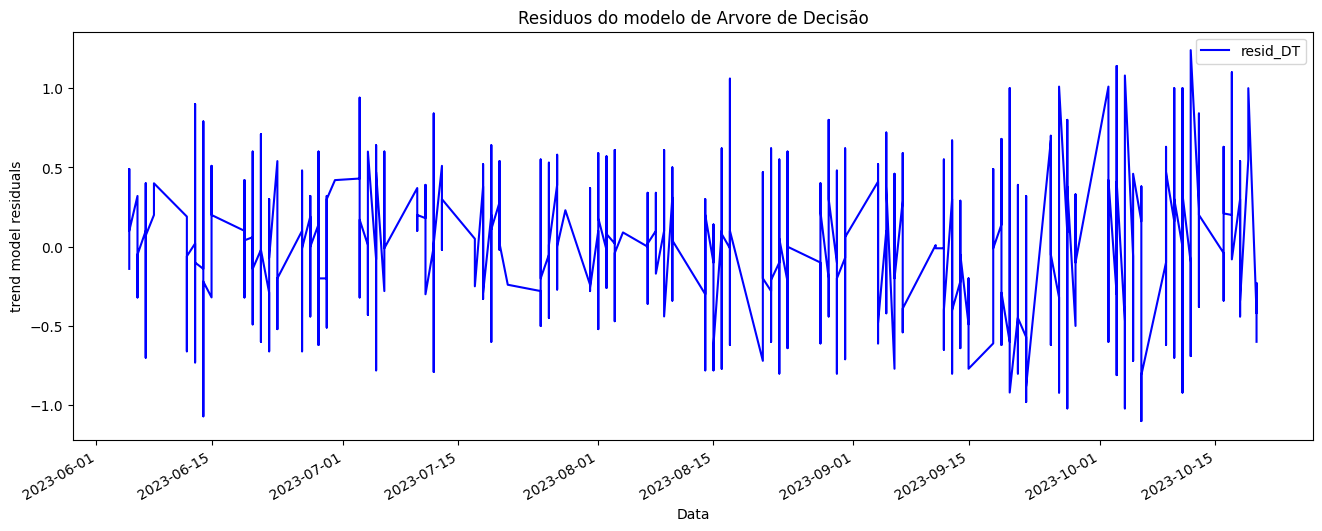

In [511]:
df_comparacao[['resid_DT']].plot(color=['b'], figsize=(16,6), ylabel='trend model residuals')

plt.title("Residuos do modelo de Arvore de Decisão")
plt.xlabel('Data')
plt.ylabel('trend model residuals')
plt.legend()

plt.show()

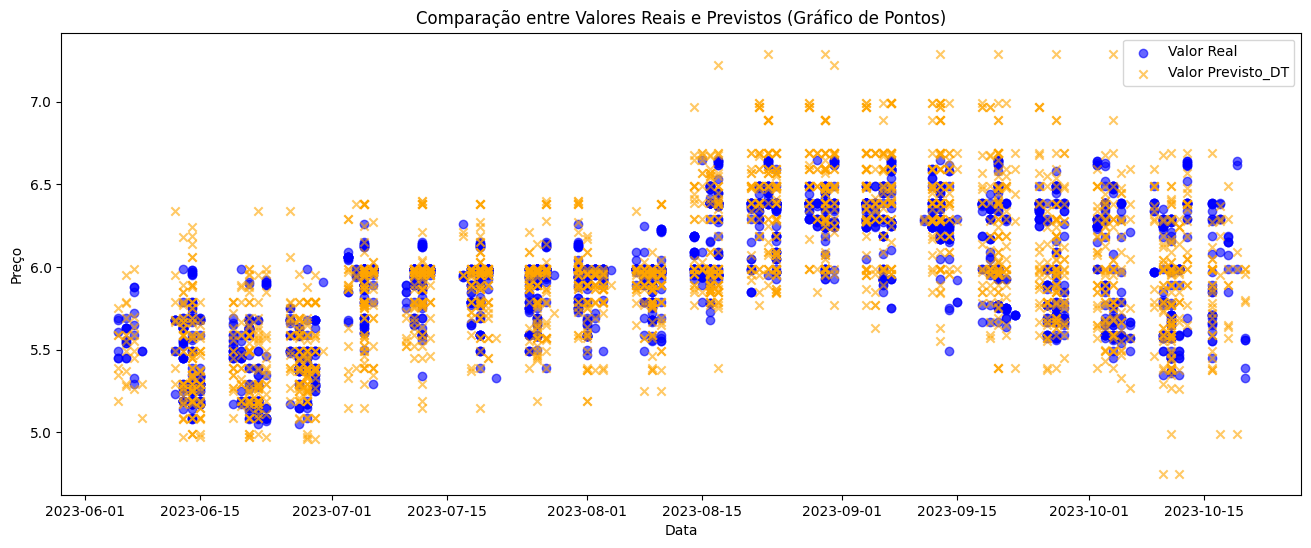

In [512]:
import matplotlib.pyplot as plt

# Criando um gráfico de pontos
plt.figure(figsize=(16, 6))
plt.scatter(df_comparacao.index, df_comparacao['Valor Real'], label='Valor Real', color='blue', alpha=0.6)
plt.scatter(df_comparacao.index, df_comparacao['Valor Previsto_DT'], label='Valor Previsto_DT', color='orange', alpha=0.6, marker='x')
plt.title('Comparação entre Valores Reais e Previstos (Gráfico de Pontos)')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()
